Getting Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73720 entries, 2019-01-01 22:00:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   73720 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


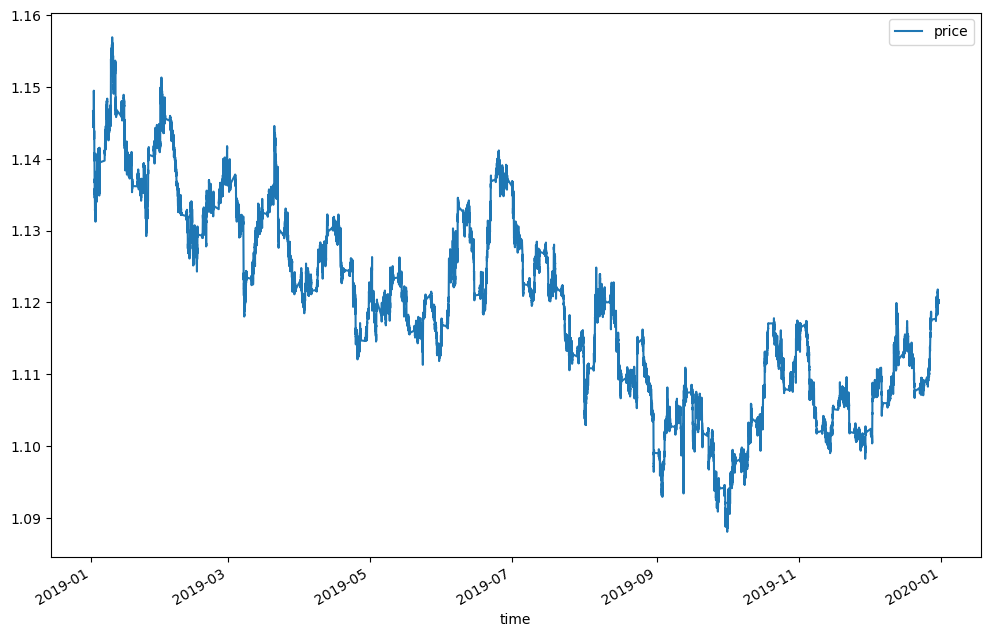

In [12]:
data.plot(figsize = (12, 8))
plt.show()

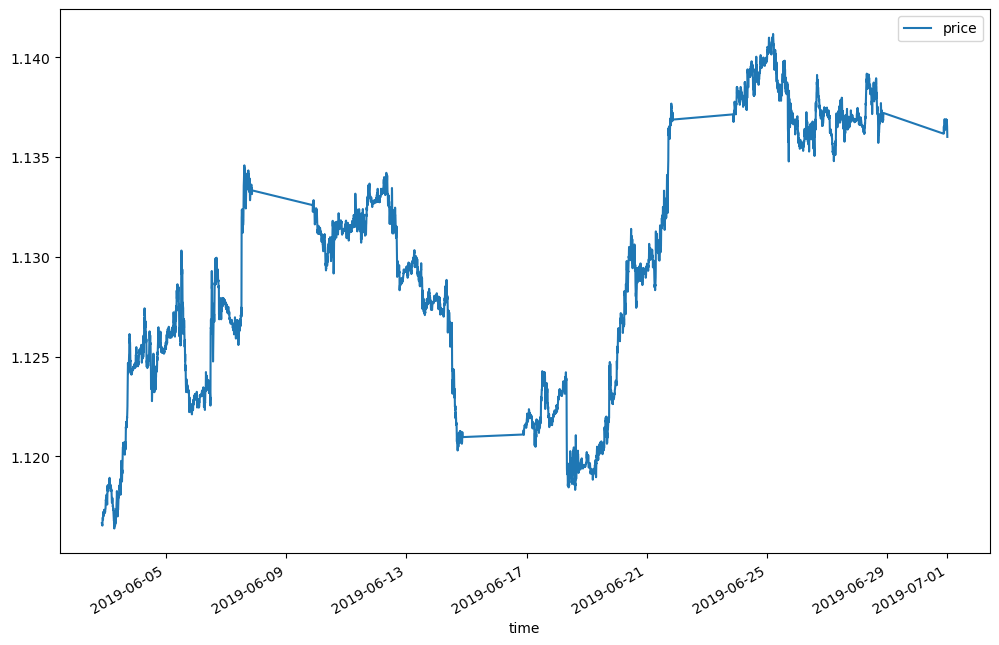

In [14]:
data.loc["2019-06"].plot(figsize = (12, 8))
plt.show()

In [16]:
data["returns"] = np.log(data.div(data.shift(1)))
data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


/////////////////////////////////////////////////////

A simple Linear Model to predict Finiancial Returns

In [36]:
# Correct: Pridicting Returns | Incorrect: Predicting Prices

In [20]:
data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004
2019-12-30 23:40:00+00:00,1.120210,0.000027
2019-12-30 23:45:00+00:00,1.120295,0.000076


In [24]:
data["lag1"] = data.returns.shift(1)

In [28]:
data.dropna(inplace = True)
data

,price,returns,lag1
time,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73718 entries, 2019-01-01 22:10:00+00:00 to 2019-12-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    73718 non-null  float64
 1   returns  73718 non-null  float64
 2   lag1     73718 non-null  float64
dtypes: float64(3)
memory usage: 2.2 MB


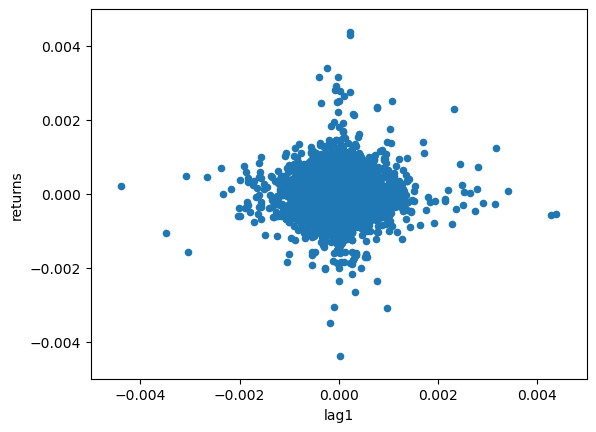

In [34]:
data.iloc[:, -2:].plot(kind = "scatter", x = "lag1", y = "returns")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

Linear Regression Part2

In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression(fit_intercept = True)

In [44]:
lm.fit(data.lag1.to_frame(), data.returns)

LinearRegression()

In [48]:
slope = lm.coef_
slope

array([-0.03350837])

In [52]:
intercept = lm.intercept_
intercept

-3.2442471445009334e-07

In [54]:
data["pred"] = lm.predict(data.lag1.to_frame())

In [56]:
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,6.397912e-06
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,5.525013e-07
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-3.244247e-07
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-6.462425e-06
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.283038e-06
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,3.414522e-06
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.748582e-07
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.221814e-06


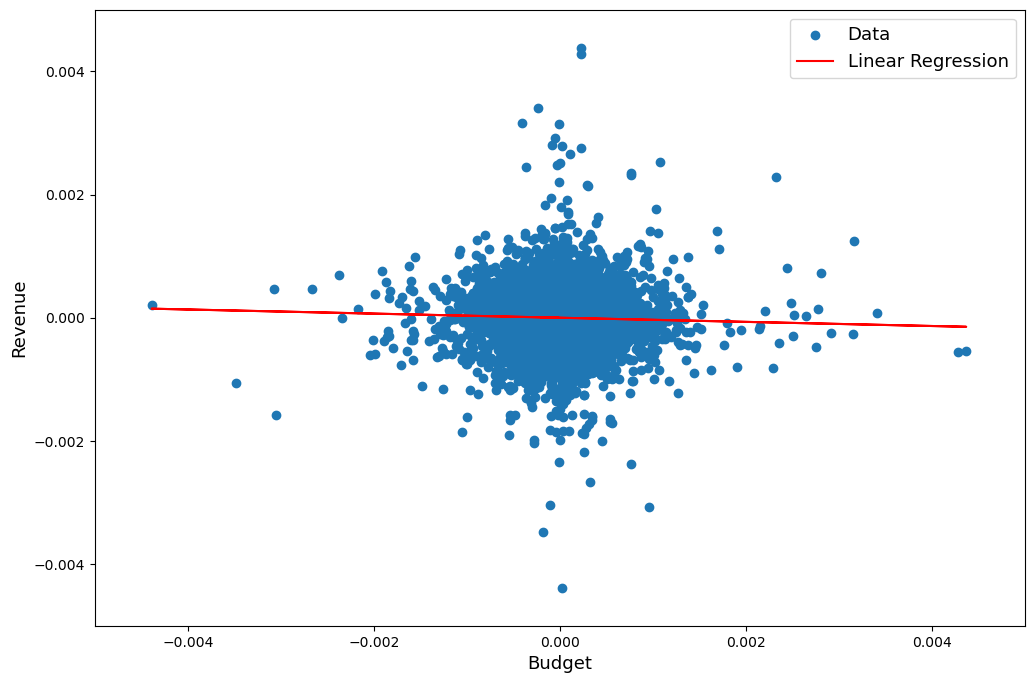

In [62]:
plt.figure(figsize = (12, 8))
plt.scatter(x = data.lag1, y = data.returns, label = "Data")
plt.plot(data.lag1, data.pred, c = "red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.legend(fontsize = 13)
plt.xlabel("Budget", fontsize = 13)
plt.ylabel("Revenue", fontsize = 13)
# plt.legend(fontsize = 13, loc = 4)
# plt.ylim(0, 150)
plt.show()

In [64]:
data.pred = np.sign(data.pred)
data

,price,returns,lag1,pred
time,,,,
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-0.000201,1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,-0.000026,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,0.000000,-1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,0.000183,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-0.000048,1.0
...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-0.000112,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,-0.000004,-1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,0.000027,-1.0


In [66]:
np.sign(data.returns * data.pred)

time
2019-01-01 22:10:00+00:00   -1.0
2019-01-01 22:15:00+00:00    0.0
2019-01-01 22:20:00+00:00   -1.0
2019-01-01 22:25:00+00:00    1.0
2019-01-01 22:30:00+00:00   -1.0
                            ... 
2019-12-30 23:35:00+00:00   -1.0
2019-12-30 23:40:00+00:00   -1.0
2019-12-30 23:45:00+00:00   -1.0
2019-12-30 23:50:00+00:00    1.0
2019-12-30 23:55:00+00:00   -1.0
Length: 73718, dtype: float64

In [74]:
hits = np.sign(data.returns * data.pred).value_counts() # results of the forcast
hits

 1.0    37451
-1.0    34308
 0.0     1959
Name: count, dtype: int64

In [78]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio # the percentage of correctly forcasted market

0.5080306031091457